# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [131]:
#Import all the necessary modules
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [132]:
pima=pd.read_csv('pima-indians-diabetes.csv')
pima.sample(3)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
626,0,125,68,0,0,24.7,0.206,21,0
450,1,82,64,13,95,21.2,0.415,23,0
81,2,74,0,0,0,0.0,0.102,22,0


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

In [133]:
#Renaming the column as given columns are not explainable enough.
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'class']
pima.columns=col_names

# Q2. Print 10 samples from the dataset

In [134]:
pima.sample(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
543,4,84,90,23,56,39.5,0.159,25,0
653,2,120,54,0,0,26.8,0.455,27,0
90,1,80,55,0,0,19.1,0.258,21,0
592,3,132,80,0,0,34.4,0.402,44,1
411,1,112,72,30,176,34.4,0.528,25,0
168,4,110,66,0,0,31.9,0.471,29,0
651,1,117,60,23,106,33.8,0.466,27,0
433,2,139,75,0,0,25.6,0.167,29,0
475,0,137,84,27,0,27.3,0.231,59,0
645,2,157,74,35,440,39.4,0.134,30,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [135]:
pima.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
class         int64
dtype: object

In [136]:
pima.shape

(768, 9)

In [137]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
class       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [138]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

###### Here pregnant is no of weeks pregnant so it could be zero if woman is not pregnant. glucose,bp,skin,insulin, bmi has minimum as zero which should not be. 


In [139]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [140]:
NewPima= pima[['glucose','bp','skin','insulin','bmi']].replace(0,np.nan)

In [141]:
NewPima = pd.concat((pima['pregnant'],NewPima, pima[['pedigree','age','class']]),axis=1)  

In [142]:
NewPima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [143]:
NewPima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     763 non-null float64
bp          733 non-null float64
skin        541 non-null float64
insulin     394 non-null float64
bmi         757 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
class       768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


###### Here I can see that glucose,bp,skin,insulin,bmi values are having NA in place of zeros now.

In [144]:
NewPima.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
bp,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
skin,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
bmi,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [145]:
NewPima=NewPima.apply(lambda x:x.fillna(x.median()),axis=0)

In [146]:
NewPima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [147]:
NewPima.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
bp,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
bmi,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


###### Since now zero values are replaced with median values for appropriate columns, we see a little shift in mean and 5 point summary values.

# Q5 Print the descriptive statistics of each & every column using describe() function

In [148]:
NewPima.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
bp,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
bmi,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


###### Here by the describe function I can see :
Pregnant: There are few women who are not pregnant as it has 0 weeks and maximum we are observing women having 17 weeks of pregnancy. Mean is higher than median here which indicates that it has positive skewed data. 

Glucose: For glucose also, we see that mean is slightly higher than median which indicates it has right skewness in data. But also we see maximum glucose level is 199 which is very high and shows outliers in data. 

BP: We see for BP, mean and median is quite equal which indicates we have normalization in data in terms of BP. 

skin: in skin also we see that mean and median are quite simillar which indicates normalization in data but if we see variance across 25%, 50% and 75%, it varies with 4 units only, which infers that there are a lot outliers in this data whcih is increasing the max count to 99. 

insulin: mean is 140 which indicats that max of women are having more insulin and very likely to have diabeties. Mean is greater than median here which also shows positive skewness in data. Few women are having very high insulin. 

bmi: average bmi is 32 here which is kind of normal in pregnancy. Here also we see low variance with high outliers as maximum value is 67. 

pedigree: This also shows a trend of having positive skewness with outliers in data.

age: average age in dataset is 33 years with outliers at max on 81 years and positive skewness. 

class: it is label which has 0 and  1 which indicates if women has diabetes or not. 


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

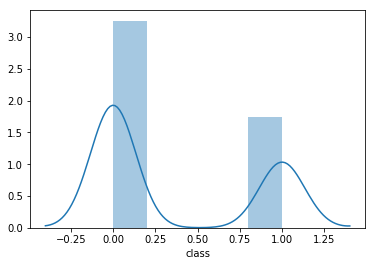

In [149]:
sns.distplot(NewPima['class'])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

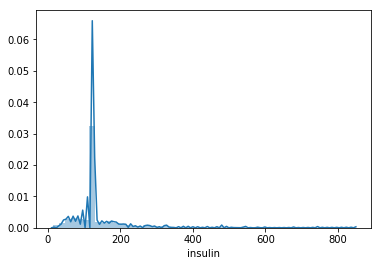

In [150]:
sns.distplot(NewPima['insulin'])

###### it has very high outliers as we can see a very very long right tail

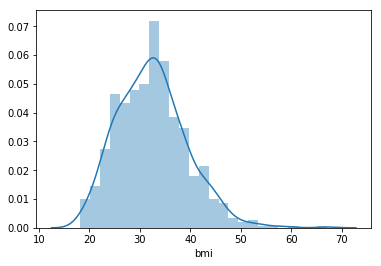

In [151]:
sns.distplot(NewPima['bmi'])

###### bmi has almost normal kernel distribution with a little bit positive skewness.

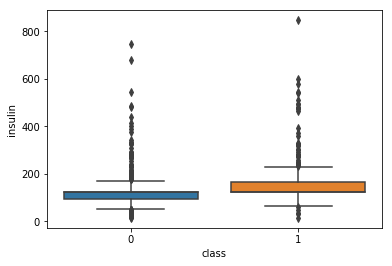

In [152]:
sns.boxplot(x='class',y='insulin',data=NewPima)

###### insuling is high in diabetic women

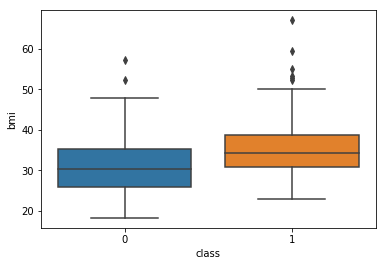

In [153]:
sns.boxplot(x='class',y='bmi',data=NewPima)

###### bmi is also high in diabetic person. 

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


In [154]:
NewPima.corr()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,class
pregnant,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
bp,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
skin,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
bmi,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
pedigree,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


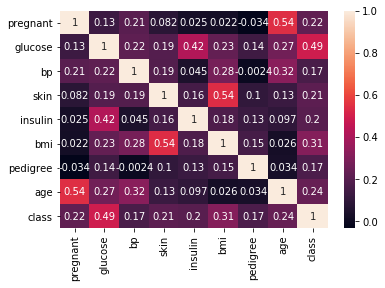

In [155]:
sns.heatmap(NewPima.corr(),annot=True)

###### We can see by heatmap that diabetic class is positively correlated with glucose level. Highest correlation we see here is .54 . Pregnancy is positively correlated with age as we tend to get older, people are tend to take chance. Glucose is also positively correlated with insulin and tends to diabetics. Skin also has positive correlation with bmi.   

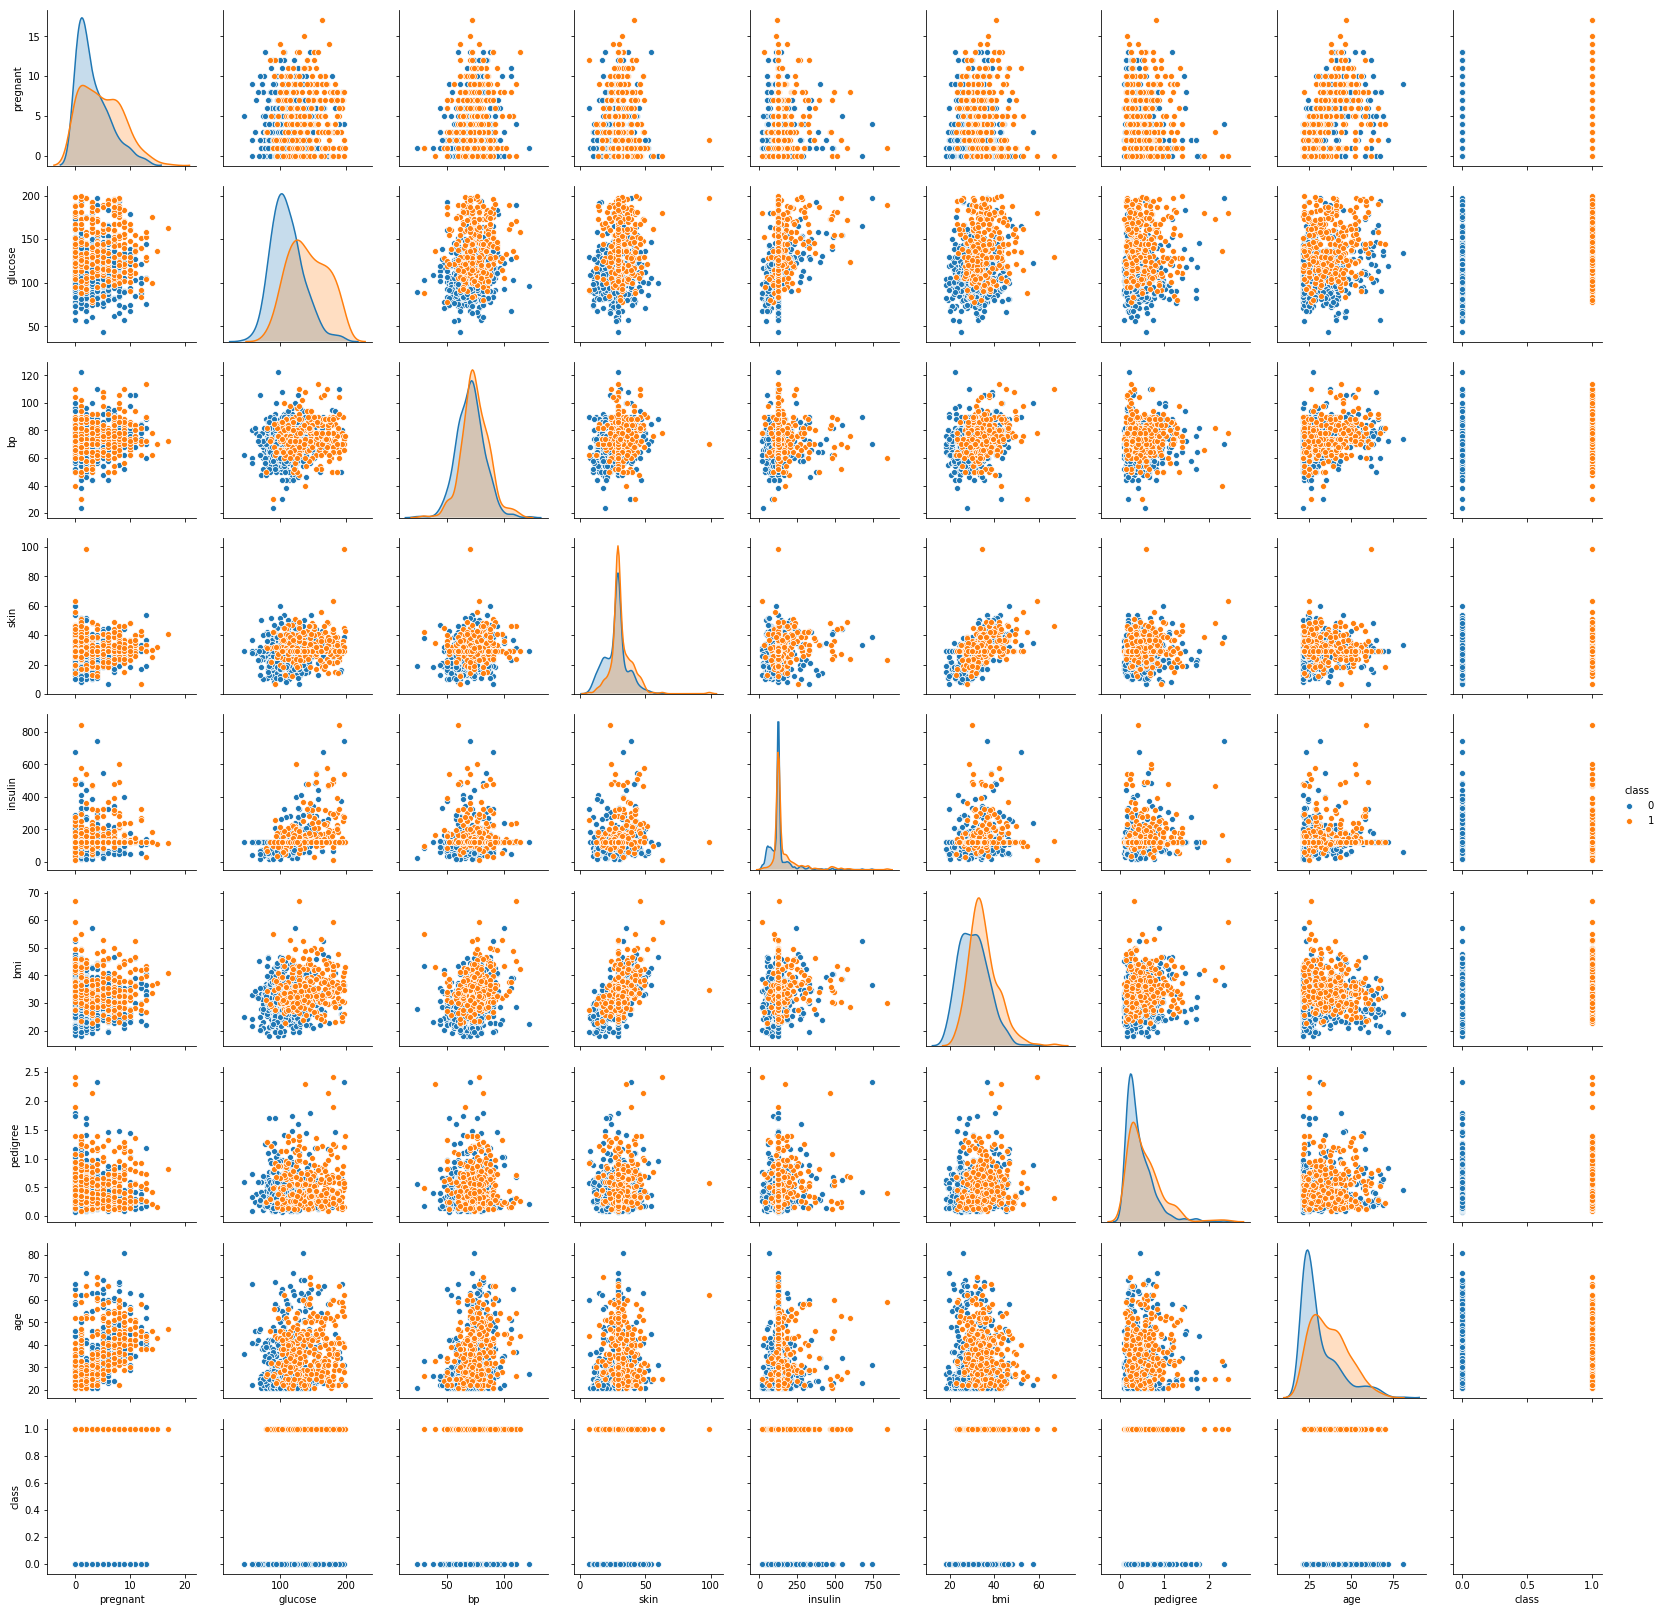

In [156]:
sns.pairplot(NewPima,hue='class')

###### Here also we can see that Pregnancy is positively correlated with age as we tend to get older, people are tend to take chance. Glucose is also positively correlated with insulin and tends to diabetics. Skin also has positive correlation with bmi. But overall correlation is not that strong with any of the variables. 


Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [157]:
X= NewPima.drop('class',axis=1)
X.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [158]:
y=NewPima['class']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [159]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [160]:
print('Train split:',X_train.shape,y_train.shape)
print('Train split:', X_test.shape,y_test.shape)

Train split: (537, 8) (537,)
Train split: (231, 8) (231,)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [161]:
myList = list(range(1,10))
# empty list that will hold cv scores
cv_scores = []
max_dep = []
for k in myList:
    dt_model = DecisionTreeClassifier(criterion='entropy',max_depth = k)
    scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    max_dep.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_dep = myList[MSE.index(min(MSE))]
print ("The optimal number of depth is %d" % best_dep)

The optimal number of depth is 3


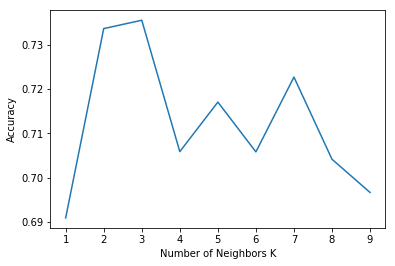

In [162]:
plt.plot(max_dep, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

In [163]:
myList = list(range(1,10))
# empty list that will hold cv scores
cv_scores = []
max_dep = []
for k in myList:
    dt_model = DecisionTreeClassifier(criterion='entropy',max_depth = k)
    scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='recall')
    cv_scores.append(scores.mean())
    max_dep.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_dep = myList[MSE.index(min(MSE))]
print ("The optimal number of depth is %d" % best_dep)

The optimal number of depth is 9


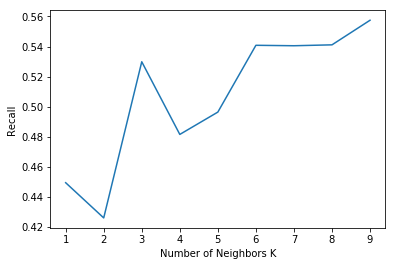

In [164]:
plt.plot(max_dep, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Recall')
plt.show()

In [165]:
myList = list(range(1,10))
# empty list that will hold cv scores
cv_scores = []
max_dep = []
for k in myList:
    dt_model = DecisionTreeClassifier(criterion='entropy',max_depth = k)
    scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='precision')
    cv_scores.append(scores.mean())
    max_dep.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_dep = myList[MSE.index(min(MSE))]
print ("The optimal number of depth is %d" % best_dep)

The optimal number of depth is 2


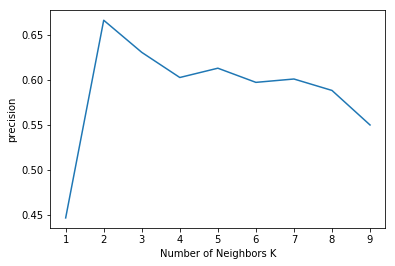

In [166]:
plt.plot(max_dep, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('precision')
plt.show()

In [167]:
myList = list(range(1,10))
# empty list that will hold cv scores
cv_scores = []
max_dep = []
for k in myList:
    dt_model = DecisionTreeClassifier(criterion='entropy',max_depth = k)
    scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='f1')
    cv_scores.append(scores.mean())
    max_dep.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_dep = myList[MSE.index(min(MSE))]
print ("The optimal number of depth is %d" % best_dep)

The optimal number of depth is 3


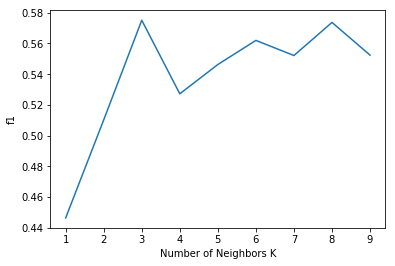

In [168]:
plt.plot(max_dep, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('f1')
plt.show()

###### Since my F1 score and accuracy both infers the best optimal value of depth is 3 hence I will go with max_depth as 3.

In [169]:
#Build Final Model
final = DecisionTreeClassifier(criterion='entropy',max_depth = 3)
final.fit(X_train,y_train)
predicted = final.predict(X_test)
confusion_matrix(y_test,predicted)


array([[123,  23],
       [ 31,  54]], dtype=int64)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [170]:
print('Training score:' , final.score(X_train,y_train))
print('Testing score:', final.score(X_test,y_test))

Training score: 0.7635009310986964
Testing score: 0.7662337662337663


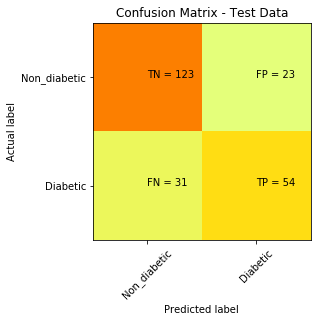

In [171]:
cm=confusion_matrix(y_test,predicted)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Non_diabetic','Diabetic']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Print the feature importance of the decision model - Optional

In [172]:
final.feature_importances_

array([0.        , 0.54069285, 0.        , 0.        , 0.02573842,
       0.31307326, 0.        , 0.12049546])

In [173]:
NewPima.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'class'],
      dtype='object')

###### Here also we can see by looking at feature importance that glucose has highest feature importance, followed by bmi